# Can we predict the pleasentness (Valence) of a substance based on its perceptual descriptors? And how does that depend on the intensity of the substance (dilution)?

Basically, yes we can (probably). Some descriptors have very strong correlation with valence.


New Ideas

- Feature engineering: Add two predictors together (sum)
- Go through the lectures and just apply all that we covered (in the exercises)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_table("data/TrainSet.txt")
df.shape

(35084, 27)

In [135]:
df.head()

,Compound Identifier,Odor,Replicate,Intensity,Dilution,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",1,7,62.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,4-Hydroxybenzaldehyde,NaN,high,1/10,1,37,60.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",2,55,89.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,126,4-Hydroxybenzaldehyde,NaN,high,1/10,2,64,71.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",3,89,68.0,0.0,62.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df.query("Intensity == 'high '").isna().sum()

Compound Identifier         0
Odor                        0
Replicate               16562
Intensity                   0
Dilution                    0
subject #                   0
INTENSITY/STRENGTH          0
VALENCE/PLEASANTNESS     2322
BAKERY                   2322
SWEET                    2322
FRUIT                    2322
FISH                     2322
GARLIC                   2322
SPICES                   2322
COLD                     2322
SOUR                     2322
BURNT                    2322
ACID                     2322
WARM                     2322
MUSKY                    2322
SWEATY                   2322
AMMONIA/URINOUS          2322
DECAYED                  2322
WOOD                     2322
GRASS                    2322
FLOWER                   2322
CHEMICAL                 2322
dtype: int64

In [140]:
df.query("Intensity == 'low '").isna().sum()

Compound Identifier         0
Odor                        0
Replicate               16562
Intensity                   0
Dilution                    0
subject #                   0
INTENSITY/STRENGTH          0
VALENCE/PLEASANTNESS     6782
BAKERY                   6782
SWEET                    6782
FRUIT                    6782
FISH                     6782
GARLIC                   6782
SPICES                   6782
COLD                     6782
SOUR                     6782
BURNT                    6782
ACID                     6782
WARM                     6782
MUSKY                    6782
SWEATY                   6782
AMMONIA/URINOUS          6782
DECAYED                  6782
WOOD                     6782
GRASS                    6782
FLOWER                   6782
CHEMICAL                 6782
dtype: int64

In [3]:
perc = df[df.columns[5:]]
perc = perc.rename(columns={"VALENCE/PLEASANTNESS": "valence"})
perc["intensity"] = df["Intensity"].replace({"high ": 1, "low ": 0})
perc["comp"] = df["Compound Identifier"]

# Part 1
EDA

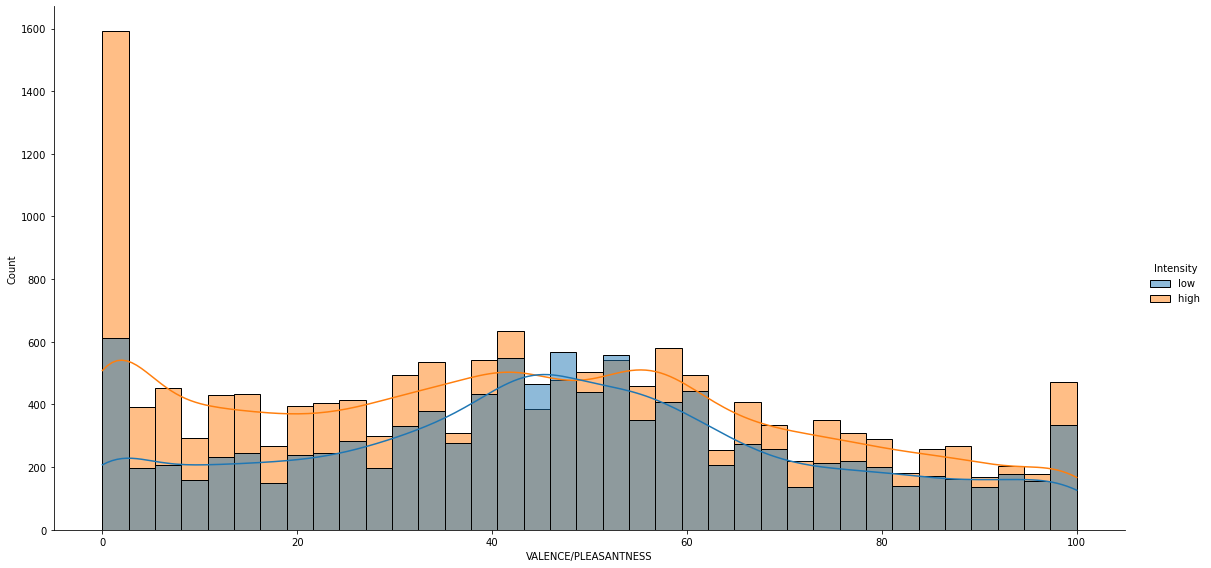

In [108]:
#compare intensities
sns.displot(data=df, x="VALENCE/PLEASANTNESS", kde=True, hue="Intensity", height=8, aspect=2)
plt.savefig("valence_across_intensity_histogram.png")
plt.show()

At high intensities, more substances are rated as unpleasent.

In [5]:
perc

,subject #,INTENSITY/STRENGTH,valence,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,COLD,...,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL,intensity,comp
0,1,7,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0,126
1,1,37,60.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,126
2,2,55,89.0,0.0,33.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,126
3,2,64,71.0,0.0,9.0,2.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,126
4,3,89,68.0,0.0,62.0,0.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35079,47,42,77.0,56.0,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6999977
35080,48,0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6999977
35081,48,22,96.0,0.0,58.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1,6999977
35082,49,72,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,9.0,0.0,2.0,0.0,0.0,0.0,3.0,0,6999977


In [6]:
comps = perc["comp"].unique()
rep = dict(zip(comps, range(len(comps))))
perc["comp"] = perc["comp"].replace(rep)

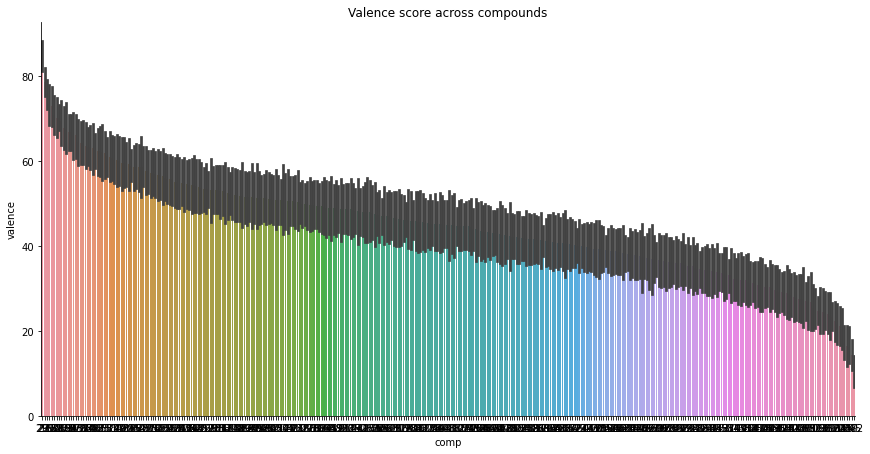

In [109]:
order = perc.groupby("comp")[["comp", "valence"]].mean()
order = order.sort_values("valence", ascending=False)
sns.catplot(data=perc, x="comp", y="valence", kind="bar", order=order["comp"], height=6, aspect=2)
plt.title("Valence score across compounds")
plt.savefig("valence_across_compounds.png")
plt.show()


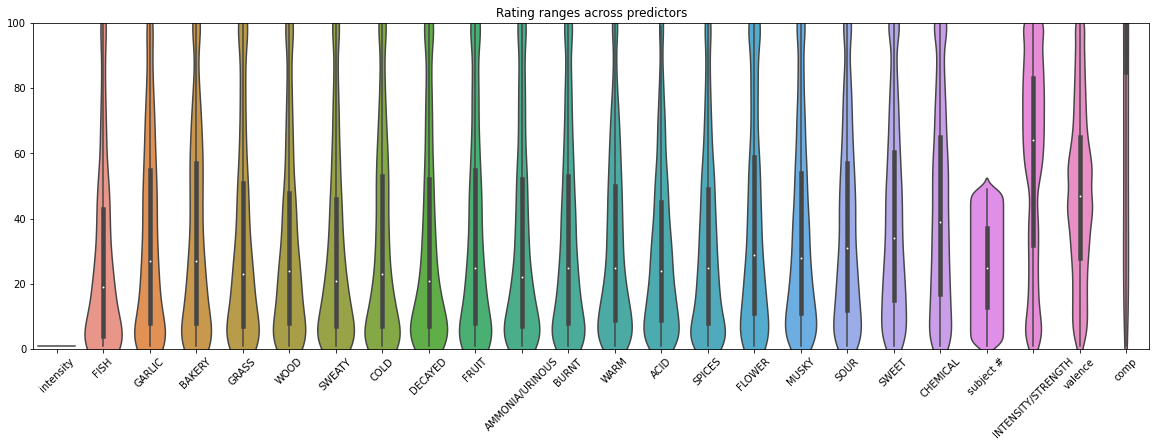

In [8]:
sorted_index = perc.mean().sort_values().index
perc_sorted = perc[sorted_index]

plt.figure(figsize=[20,6])
sns.violinplot(data=perc_sorted[perc_sorted > 0])
plt.xticks(rotation=45)
plt.ylim([0,100])
plt.title("Rating ranges across predictors")
plt.show()

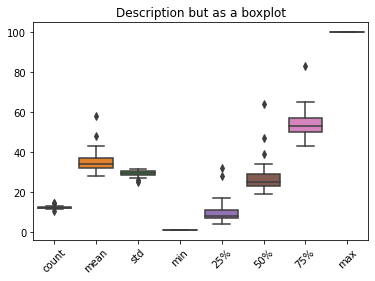

In [9]:
desc = perc[perc > 0].describe()
desc = desc.drop(columns=["subject #", "intensity", "comp"]).T
desc["count"] = np.log2(desc["count"])
sns.boxplot(data=desc)
plt.xticks(rotation=45)
plt.title("Description but as a boxplot")
plt.show()

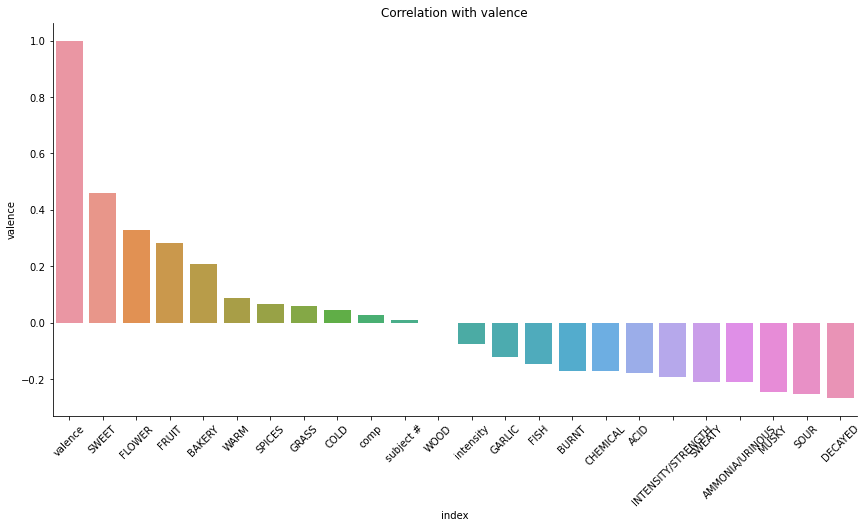

In [107]:

corm = perc.corr()["valence"]
corm = corm.sort_values(ascending=False)
corm = corm.reset_index()
sns.catplot(data=corm, x="index", y="valence", kind="bar", height=6, aspect=2)
plt.title("Correlation with valence")
plt.xticks(rotation=45)
plt.savefig("feature_correlation_with_valence.png")
plt.show()

In [ ]:
perc.query("intensity == 'low').shape

# Part 2: Regression & Prediction

In [11]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as stats
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree


#### Data Preparation

In [12]:
# remove NAs (naively)
percnn = perc.dropna()
# scale data
scaler = StandardScaler()
scaled = scaler.fit_transform(percnn)

lost_low = perc.query("intensity == 0").shape[0] - percnn.query("intensity == 0").shape[0]
lost_high = perc.query("intensity == 1").shape[0] - percnn.query("intensity == 1").shape[0]
print(f'Lost {perc.shape[0] - percnn.shape[0]} rows. {lost_low} in low, {lost_high} in high')
percnn.head()

Lost 9104 rows. 6782 in low, 2322 in high


,subject #,INTENSITY/STRENGTH,valence,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,COLD,...,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL,intensity,comp
0,1,7,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,37,60.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,2,55,89.0,0.0,33.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,0
3,2,64,71.0,0.0,9.0,2.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1,0
4,3,89,68.0,0.0,62.0,0.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [13]:
print(scaled.shape)
print(percnn.shape)

(25980, 24)
(25980, 24)


In [18]:
# label & predictor columns
labels = ["valence"]
data = ['INTENSITY/STRENGTH', 'BAKERY', 'SWEET','FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
       'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD','GRASS', 'FLOWER', 'CHEMICAL']
cols = list(percnn.columns)
data_indices = [cols.index(x) for x in data]
label_index = cols.index("valence")

X, x, Y, y = train_test_split(percnn[data], percnn[labels])
Xs, xs, Ys, ys = train_test_split(scaled[:,data_indices], scaled[:,label_index])
print(X.shape)
print(Y.shape)
print(Xs.shape)
print(Ys.shape)

(19485, 20)
(19485, 1)
(19485, 20)
(19485,)


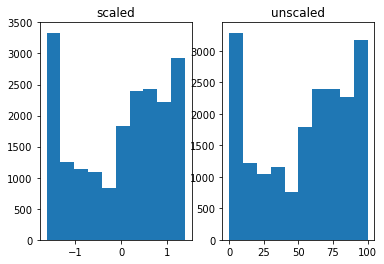

looks good


In [19]:
# check if the indices are the same for both datasets
plt.figure()
plt.subplot(1,2,1)
plt.hist(Xs[:,0])
plt.title("scaled")
plt.subplot(1,2,2)
plt.hist(X.iloc[:,0])
plt.title("unscaled")
plt.show()
print("looks good")

### Ridgeregeression with crossvalidation, scaled vs unscaled features

In [20]:
# calculate size of cv group, use suareroot as ssuggested in lecture
cv_fold = int(np.sqrt(percnn.shape[0]))

In [21]:
rcv = RidgeCV(alphas=(0.1, 1, 10), cv=cv_fold)
rcvs = RidgeCV(alphas=(0.1, 1, 10), cv=cv_fold)

In [22]:
rcv.fit(X,Y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=161)

In [23]:
rcvs.fit(Xs,Ys)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=161)

In [24]:
rcv.score(x, y)

0.43897246761331354

In [25]:
rcvs.score(xs, ys)

0.42671169546659105

### Set up RidgeRegression functioins

In [26]:
def olfaction_tts(data=percnn, intensity=None):
    """ 
    takes olfaction data and returns X,x,Y,y
    scales data
    param intensity: select for high (1) or low (0) intensity, default=None (take whole dataset)
    """
    if intensity:
        data = data.query("intensity == @intensity")
    
    # transform the column labels to numerical indices
    labels = ["valence"]
    predictors = ['INTENSITY/STRENGTH', 'BAKERY', 'SWEET','FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
           'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD','GRASS', 'FLOWER', 'CHEMICAL']
    cols = ['subject #', 'INTENSITY/STRENGTH', 'valence', 'BAKERY', 'SWEET',
       'FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
       'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD',
       'GRASS', 'FLOWER', 'CHEMICAL', 'intensity', 'comp']
    
    predictor_indices = [cols.index(x) for x in predictors]
    label_index = cols.index("valence")
    
    # scale the data
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data)
    # return the split
    return list(train_test_split(scaled[:,predictor_indices], scaled[:,label_index]))

In [27]:
def ridgecv(set_list, alphas=None):
    """
    Performs CV regression on the "set list" input which is list(X,x,Y,y)
    """
    if not alphas:
        alphas = (0.1, 1, 10)
    
    # cv_fold = int(np.sqrt(percnn.shape[0]))
    
    rcv = RidgeCV(alphas=alphas, cv=160)
    
    rcv.fit(set_list[0], set_list[2])
    
    print(f'score {rcv.score(set_list[1], set_list[3])}')
    return rcv

In [28]:
def evaluate(intensity=None):
    if intensity:
        tts = olfaction_tts(percnn, intensity)
    else:
         tts = olfaction_tts(percnn)   
    res = dict()

    for i in np.logspace(0.01, 2, 5):
        if i > 1:
            i=int(i)
        alpha=(i,i*10)
        cls = ridgecv(tts, alphas=alpha)
        res.update({str(alpha):cls})

    for k, v in res.items():
        print(k , "\t",v.best_score_)
    return res

## Evaluate Ridge regression

In [29]:
# model evaluation using high
high = evaluate(1)
# model evaluation using low
low = evaluate(0)
# model evaluation using both
both = evaluate()

score 0.44223350655301163
score 0.44221111382226297
score 0.44212562382822695
score 0.44220997014703123
score 0.44212562382822695
(1, 10) 	 0.4224732900550025
(3, 30) 	 0.42247978150796417
(10, 100) 	 0.4224942036408974
(31, 310) 	 0.42248007806159704
(100, 1000) 	 0.4224942036408974
score 0.43987226446561456
score 0.439855528316072
score 0.4397942981429428
score 0.43958668453187544
score 0.4397942981429428
(1, 10) 	 0.4158168907780174
(3, 30) 	 0.41582111477323347
(10, 100) 	 0.41583290362084846
(31, 310) 	 0.41584121628700793
(100, 1000) 	 0.41583290362084846
score 0.42618607854936064
score 0.4261958162950491
score 0.4262266800570055
score 0.4262902048303221
score 0.4262266800570055
(1, 10) 	 0.4212163518842574
(3, 30) 	 0.42121997488470403
(10, 100) 	 0.42122955242211135
(31, 310) 	 0.42123026417009246
(100, 1000) 	 0.42122955242211135


In [30]:
X,x,Y,y =  olfaction_tts(data=percnn, intensity=None)
b = list()
h = list()
l = list()
for k, v in both.items():
    b.append(v.score(x,y))
for k, v in high.items():
    h.append(v.score(x,y))
for k, v in low.items():
    l.append(v.score(x,y))

In [31]:
results = pd.DataFrame({"both":b, "high":h, "low":l, "alpha":list(both.keys())})
r = results.melt(id_vars="alpha")

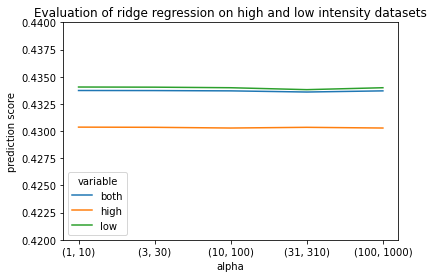

In [106]:
sns.lineplot(data=r, x="alpha", y="value",hue="variable")
plt.title("Evaluation of ridge regression on high and low intensity datasets")
plt.ylabel("prediction score")
plt.ylim([0.42,0.44])
plt.savefig("evaluate_ridge_regresion.png")
plt.show()

### Single DecisionTreeRegressor

In [33]:
def evaluate_trees(data=percnn):
    b, B, l, L, H, h = list(), list(), list(), list(), list(), list()
    sets = olfaction_tts(data=data, intensity=0)
    d = list(range(6,10))
    for depth in d:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(sets[0], sets[2])
        l.append(regr.score(sets[1], sets[3]))
        L.append(regr)
    sets = olfaction_tts(data=data, intensity=1)
    for depth in d:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(sets[0], sets[2])
        h.append(regr.score(sets[1], sets[3]))
        H.append(regr)
    sets = olfaction_tts(data=data, intensity=None)
    for depth in d:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(sets[0], sets[2])
        b.append(regr.score(sets[1], sets[3]))  
        B.append(regr)
    
    return b, l, h, d, B, L, H

In [34]:
aggregate = pd.DataFrame()
for it in range(100):
    b, l, h, d, B, L, H = evaluate_trees()
    tree_result = pd.DataFrame({"both":b, "high":h, "low":l, "depth":d, "it":[it] * len(d)})
    #trees = pd.DataFrame({"both":B, "high":H, "low":L, "depth":d, "it":[it] * len(d)})
    rt = tree_result.melt(id_vars=["depth", "it"])
    aggregate = aggregate.append(rt, ignore_index=True)

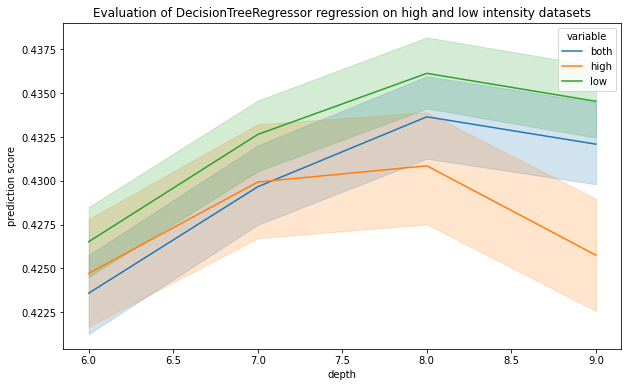

In [103]:
plt.figure(figsize=[10,6])
sns.lineplot(data=aggregate, x="depth", y="value",hue="variable")
plt.title("Evaluation of DecisionTreeRegressor regression on high and low intensity datasets")
plt.ylabel("prediction score")
plt.savefig("comparing_individual_trees.png")
plt.show()

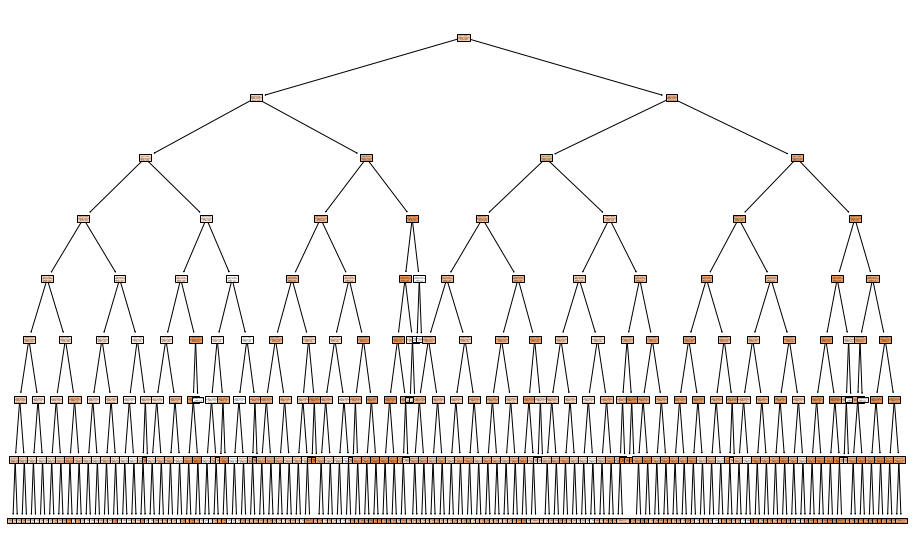

In [36]:
plt.figure(figsize=(16,10))
tree_fig = plot_tree(B[2], filled=True)

### The trees rely heavily on SWEETness

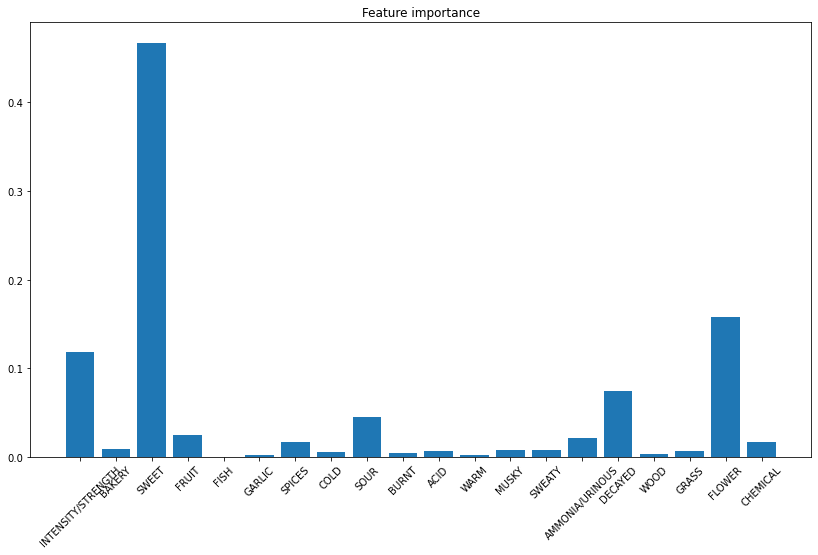

In [102]:
plt.figure(figsize=(14,8))
dat = B[2].feature_importances_ 
plt.bar(height=dat, x=['INTENSITY/STRENGTH', 'BAKERY', 'SWEET','FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
           'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD','GRASS', 'FLOWER', 'CHEMICAL'])
plt.xticks(rotation=45)
plt.title("Feature importance")
plt.savefig("featureimportance_of_individual_tree.png")
plt.show()

### Random Forest regressors: Testing tree depth

In [94]:
from sklearn.ensemble import RandomForestRegressor

X,x,Y,y = olfaction_tts()
score=list()
deps = list(range(7,17))
for dep in deps:
    rf = RandomForestRegressor(max_depth=dep, random_state=0)
    rf.fit(X, Y)
    score.append(rf.score(x,y))
    

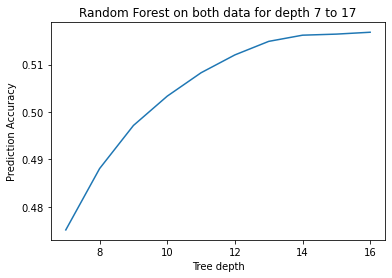

In [101]:
plt.plot(deps, score)
plt.title("Random Forest on both data for depth 7 to 17")
plt.xlabel("Tree depth")
plt.ylabel("Prediction Accuracy")
plt.savefig("Investigating_tree_depth.png")
plt.show()

In [96]:
def eval_rf(intensity):
    X,x,Y,y = olfaction_tts(intensity=intensity)
    score=list()
    deps = list(range(12,20))
    
    for dep in deps:
        rf = RandomForestRegressor(max_depth=dep, random_state=0, )
        rf.fit(X, Y)
        score.append(rf.score(x,y))
        
    return score

In [97]:
low1 = eval_rf(0)
low2 = eval_rf(0)
low3 = eval_rf(0)
high1 = eval_rf(1)
high2 = eval_rf(1)
high3 = eval_rf(1)
both1 = eval_rf(None)
both2 = eval_rf(None)
both3 = eval_rf(None)

In [98]:
low = low1 + low2 + low3
high = high1 + high2 + high3
both = both1 + both2 + both3
rep = [1] * len(low1) + [2] * len(low1) + [3] * len(low1)
depth = list(range(12,20)) * 3
rf_df = pd.DataFrame({"low": low, "high":high, "both": both, "depth":depth, "rep":rep})
rf_df = rf_df.melt(id_vars=["depth", "rep"])

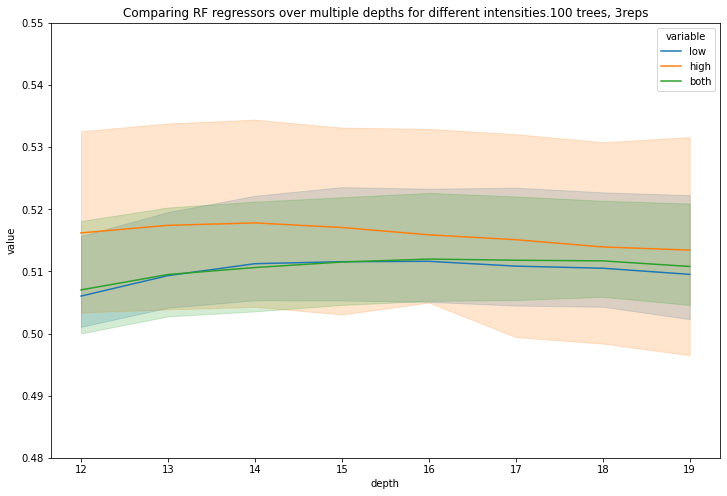

In [110]:
plt.figure(figsize=(12,8))
sns.lineplot(data=rf_df, x="depth", y="value", hue="variable")
plt.ylim([0.48, 0.55])
plt.title("Comparing RF regressors over multiple depths for different intensities.100 trees, 3reps")
plt.savefig("depth_comparison_in_rf_regressors.png")
plt.show()


### Random Forest regressors: Testing splitting criterion

In [53]:
def eval_rf_crit(intensity):
    X,x,Y,y = olfaction_tts(intensity=intensity)
    score=list()
    criteria = ["squared_error", "absolute_error", "poisson"]
    
    for crit in criteria:
        rf = RandomForestRegressor(max_depth=14, random_state=0, criterion=crit)
        rf.fit(X, Y)
        score.append(rf.score(x,y))
        
    return score

In [ ]:
lowc = eval_rf_crit(0)
highc = eval_rf_crit(1)
bothc = eval_rf_crit()

In [87]:
cr = ["squared_error", "absolute_error", "poisson"]
point = list(range(7,15))
criteria = np.repeat(cr, 8)
points = point * 3

24

In [88]:
rf_dfc = pd.DataFrame({"low": lowc, "high":highc, "both": bothc, "point": points, "criterion":criteria})
rf_dfc = rf_dfc.melt(id_vars=["criterion", "point"])

<Figure size 864x576 with 0 Axes>

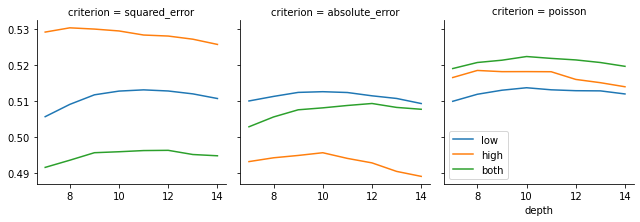

<Figure size 432x288 with 0 Axes>

In [91]:
plt.figure(figsize=(12,8))
g = sns.FacetGrid(data=rf_dfc, col="criterion")
g.map_dataframe(sns.lineplot, x="point", y="value", hue="variable")
plt.suptitle("")
plt.ylabel("Prediction Accuracy")
plt.xlabel("depth")
plt.legend()
plt.show()
plt.savefig("Comparing_different_splitting_criteria.png")